# Lab | Imbalanced data
We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

## Instructions
1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

### Extracting and selecting data

In [2]:
complete_data = pd.read_csv('customer_churn.csv')
complete_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data = complete_data[['tenure','SeniorCitizen','MonthlyCharges','Churn']]
data

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [4]:
# def churn_transf(txt):
#     if txt == "Yes":
#         return 1
#     else:
#         return 0

# data['Churn']=data['Churn'].apply(lambda x: churn_transf(x))
# data


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
data['SeniorCitizen'].unique()  # checking if it is really a categorical which has been encoded already... it is!

array([0, 1], dtype=int64)

### X-y split, train-test split and scalling

In [7]:
X = data.drop(columns=['Churn'], axis=1)
y = data ['Churn']

display(X)
display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [8]:
X_train_num = X_train.select_dtypes(include = np.number)
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1.000000,0.0,0.665174
1,0.194444,1.0,0.279602
2,0.986111,0.0,0.064179
3,0.458333,0.0,0.553731
4,0.652778,0.0,0.800995


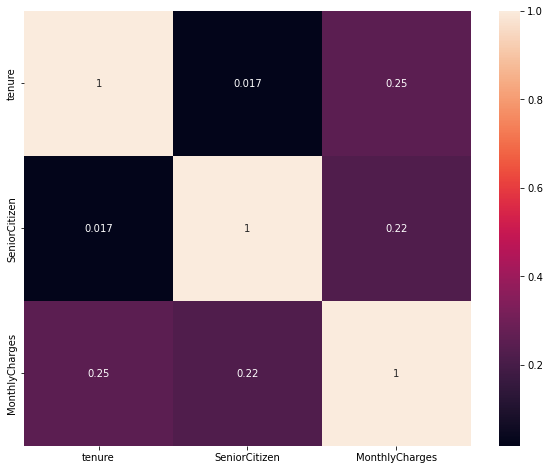

In [9]:
#checking correlations
#No high correlation found, all features to be kept

corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

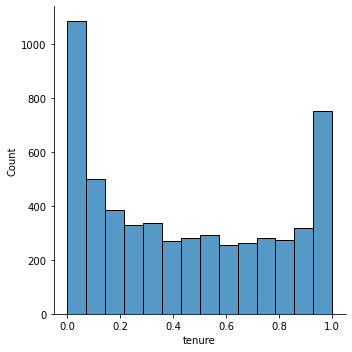

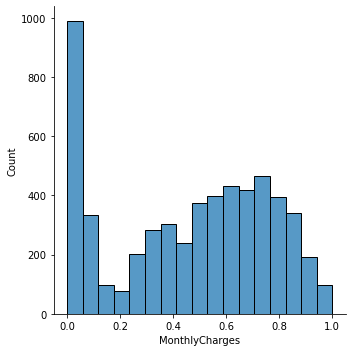

In [10]:
sns.displot(X_train_norm['tenure'])


sns.displot(X_train_norm['MonthlyCharges'])

In [11]:
X_train_transformed = X_train_norm # there is no further categoricals to transform and concatenate, so X transformed = X normalised
X_train_transformed

,tenure,SeniorCitizen,MonthlyCharges
0,1.000000,0.0,0.665174
1,0.194444,1.0,0.279602
2,0.986111,0.0,0.064179
3,0.458333,0.0,0.553731
4,0.652778,0.0,0.800995
...,...,...,...
5629,0.208333,0.0,0.847761
5630,0.138889,0.0,0.724876
5631,0.805556,0.0,0.024876
5632,0.013889,1.0,0.512438


In [12]:
# Scaling the numerical test data

X_test_num = X_test.select_dtypes(include = np.number)
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_transformed = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_transformed

,tenure,SeniorCitizen,MonthlyCharges
0,0.263889,0.0,0.397512
1,0.833333,0.0,0.978607
2,0.180556,0.0,0.534328
3,0.013889,0.0,0.021891
4,0.763889,0.0,0.592040
...,...,...,...
1404,0.097222,1.0,0.805970
1405,0.180556,0.0,0.697512
1406,0.777778,1.0,0.932338
1407,0.250000,0.0,0.378109


### Building and evaluating the model

In [13]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_transformed, y_train)
LR.score(X_test_transformed, y_test)

0.7849538679914834

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred,pos_label='Yes'))
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred,pos_label='Yes'))


precision:  0.6190476190476191
recall:  0.4592391304347826
f1:  0.5273010920436817


In [15]:
print(y_test.value_counts())

No     1041
Yes     368
Name: Churn, dtype: int64


In [16]:
pd.Series(pred).value_counts()

No     1136
Yes     273
dtype: int64

In [17]:
# predicted     | NO  | YES | 
# -------------------------------------------
# actual  NO   |  +  |     | 
# -------------------------------------------
#         YES |     |  +  |
# -------------------------------------------

In [18]:
confusion_matrix(y_test, pred)

array([[937, 104],
       [199, 169]], dtype=int64)

### Understading the validity of the model
Since the data is very imbalanced, the model will overestimate the dominant category, which in this case is the no churn.
Even though the model will get many of those "no churn" values right, it will fail to predict most of the actual churn cases, which is exactly the goal of the evaluation. Therefore, despite the high accuracy, the model does not fulfil its purpose.

### Applying SMOTE

In [30]:
sm = SMOTE(random_state=100, k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)

In [31]:
X_train_SMOTE

,tenure,SeniorCitizen,MonthlyCharges
0,1.000000,0.0,0.665174
1,0.194444,1.0,0.279602
2,0.986111,0.0,0.064179
3,0.458333,0.0,0.553731
4,0.652778,0.0,0.800995
...,...,...,...
8261,0.219853,0.0,0.395096
8262,0.276817,0.0,0.676445
8263,0.013889,0.0,0.064111
8264,0.628491,1.0,0.911818


In [32]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
LR.score(X_test_transformed, y_test)

0.7182398864442867

In [33]:
pred = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred,pos_label='Yes'))
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred,pos_label='Yes'))

precision:  0.47387387387387386
recall:  0.7146739130434783
f1:  0.5698808234019501


In [23]:
# predicted     | NO  | YES | 
# -------------------------------------------
# actual  NO   |  +  |     | 
# -------------------------------------------
#         YES |     |  +  |
# -------------------------------------------

In [34]:
confusion_matrix(y_test,pred)

array([[749, 292],
       [105, 263]], dtype=int64)

Oversampling has caused more false positives, thus decreasing the overal accuracy of the model. On the other hand, it also increased the true positives (consequently reducing the false negatives). It means that even though  more customers will be falsely flagged as potential churns, more churns will be properly predicted.